In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [8]:
sample = mnist.train.images[2].reshape(28,28)

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

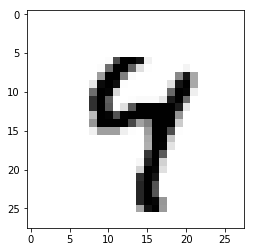

In [11]:
plt.imshow(sample, cmap='Greys')

In [12]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [13]:
n_classes = 10
n_samples = mnist.train.num_examples

In [14]:
n_input = 784

In [15]:
n_hidden1 = 256
n_hidden2 = 256

In [23]:
def multilayer_perceptron(x,weights,biases):
    
    #RELU function: f(x)-> max(0,x)
    #First hidden layer
    
    layer1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer1 = tf.nn.relu(layer1)
    
    #Second hidden layer
    
    layer2 = tf.add(tf.matmul(layer1,weights['h2']),biases['b2'])
    layer2 = tf.nn.relu(layer2)
    
    #Last output layer
    
    out_layer = tf.matmul(layer2,weights['out']) + biases['out']
    
    return out_layer

In [24]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_classes]))
}

In [25]:
weights

{'h1': <tf.Variable 'Variable_6:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>}

In [26]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden1])),
    'b2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [27]:
x = tf.placeholder('float',[None,n_input])

In [28]:
y = tf.placeholder('float',[None,n_classes])

In [29]:
pred = multilayer_perceptron(x,weights,biases)

In [35]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# TRAINING THE MODEL

In [55]:
t = mnist.train.next_batch(1)

In [56]:
Xsamp,ysamp = t

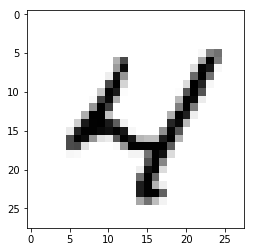

In [57]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [58]:
ysamp

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

# RUNNING THE SESSION

In [59]:
sess = tf.InteractiveSession()

In [60]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [61]:
sess.run(init)

In [62]:
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=168.8909
Epoch: 2 cost=39.2400
Epoch: 3 cost=24.5082
Epoch: 4 cost=16.6843
Epoch: 5 cost=12.0870
Epoch: 6 cost=8.8003
Epoch: 7 cost=6.5644
Epoch: 8 cost=4.8146
Epoch: 9 cost=3.4637
Epoch: 10 cost=2.6291
Epoch: 11 cost=1.9373
Epoch: 12 cost=1.4059
Epoch: 13 cost=1.0662
Epoch: 14 cost=0.9535
Epoch: 15 cost=0.6680
Model has completed 15 Epochs of Training


In [64]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [65]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [66]:
accuracy = tf.reduce_mean(correct_predictions)

In [67]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [68]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.94959998